In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

EXP1

x_train: (22, 1)	y_train: (22, 1)
x_test: (8, 1)		y_test: (8, 1)
coefficients:	 1.008
intercept:		 -0.018
score:			 0.979


E:\ProgramData\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


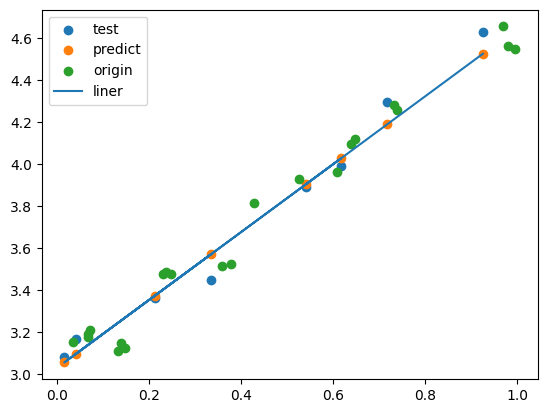

In [2]:
data = np.array([
    [0.067732, 3.176513], [0.427810, 3.816464], [0.995731, 4.550095], [0.738336, 4.256571], [0.981083, 4.560815],
    [0.526171, 3.929515], [0.378887, 3.526170], [0.033859, 3.156393], [0.132791, 3.110301], [0.138306, 3.149813],
    [0.247809, 3.476346], [0.648270, 4.119688], [0.731209, 4.282233], [0.236833, 3.486582], [0.969788, 4.655492],
    [0.607492, 3.965162], [0.358622, 3.514900], [0.147846, 3.125947], [0.637820, 4.094115], [0.230372, 3.476039],
    [0.070237, 3.210610], [0.067154, 3.190612], [0.925577, 4.631504], [0.717733, 4.295890], [0.015371, 3.085028],
    [0.335070, 3.448080], [0.040486, 3.167440], [0.212575, 3.364266], [0.617218, 3.993482], [0.541196, 3.891471]])

mms = MinMaxScaler()
mms.fit(data)
data_norm = mms.transform(data)
# 数据归一化

X = data_norm[:, 0:1]
Y = data_norm[:, 1:2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=False)
print(f"x_train: {x_train.shape}\ty_train: {y_train.shape}\nx_test: {x_test.shape}\t\ty_test: {y_test.shape}")
# 切割数据集，转为测试集和训练集

model = LinearRegression()
model.fit(x_train, y_train)
# 模型拟合

print("coefficients:\t", round(model.coef_[0][0], 3))
print("intercept:\t\t", round(model.intercept_[0], 3))
print("score:\t\t\t", round(model.score(x_test, y_test), 3))
# 模型得分评估

y_pred = model.predict(x_test)
y_real = y_test.copy()
x_y_real = np.array([[x_test[i][0], y_test[i][0]] for i in range(len(x_test))])
x_y_pred = np.array([[x_test[i][0], model.predict([x_test[i]])[0]] for i in range(len(x_test))])
x_y_train = np.array([[x_train[i][0], y_train[i][0]] for i in range(len(x_train))])
x_y_real_inverse = mms.inverse_transform(x_y_real)
x_y_pred_inverse = mms.inverse_transform(x_y_pred)
x_y_train_inverse = mms.inverse_transform(x_y_train)
# 测试模型在验证集的准确率，并且反归一化

plt.scatter(x_y_real_inverse[:, 0], x_y_real_inverse[:, 1], label='test')
plt.scatter(x_y_pred_inverse[:, 0], x_y_pred_inverse[:, 1], label='predict')
plt.scatter(x_y_train_inverse[:, 0], x_y_train_inverse[:, 1], label='origin')
plt.plot(x_y_pred_inverse[:, 0], x_y_pred_inverse[:, 1], label='liner')
plt.legend()
# 绘图

EXP2

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x_train: (16, 2)	y_train: (16, 1)
x_test: (4, 2)		y_test: (4, 1)
coefficients:	 0.019
intercept:		 3.515
score:			 -1.095


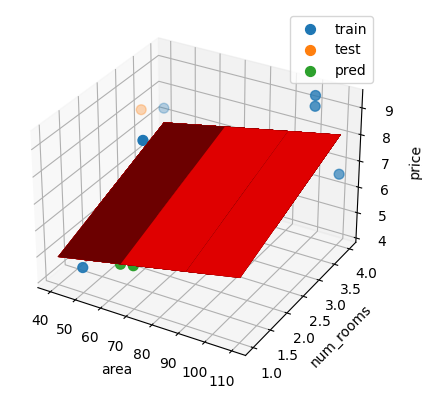

In [4]:
data = np.array([[100, 4, 9.3],
                 [50, 1, 4.8],
                 [100, 4, 8.9],
                 [100, 3, 6.5],
                 [50, 2, 4.2],
                 [80, 2, 6.2],
                 [75, 3, 7.4],
                 [65, 4, 6.0],
                 [90, 3, 7.6],
                 [90, 2, 6.1],
                 [110, 4, 6.6],
                 [40, 3, 5.4],
                 [70, 3, 7.6],
                 [60, 2, 8.7],
                 [80, 3, 5.7],
                 [40, 4, 7.3],
                 [70, 1, 6.7],
                 [65, 1, 5.9],
                 [95, 2, 8.2],
                 [45, 3, 8.4], ])
# 数据归一化

X = data[:, 0:2]
Y = data[:, 2:3]
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=False, train_size=0.8)
print(f"x_train: {x_train.shape}\ty_train: {y_train.shape}\nx_test: {x_test.shape}\t\ty_test: {y_test.shape}")
# 切割数据集，转为测试集和训练集

model = LinearRegression()
model.fit(x_train, y_train)
# 模型拟合

print("coefficients:\t", round(model.coef_[0][0], 3))
print("intercept:\t\t", round(model.intercept_[0], 3))
print("score:\t\t\t", round(model.score(x_test, y_test), 3))
# 模型得分评估

b = model.intercept_
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
# 获取截距和斜率

x_y_real = np.array([[x_test[i][0], x_test[i][1], y_test[i][0]] for i in range(len(x_test))])
x_y_pred = np.array([[x_test[i][0], x_test[i][1], model.predict([x_test[i]])[0][0]] for i in range(len(x_test))])
x_y_train = np.array([[x_train[i][0], x_train[i][1], y_train[i][0]] for i in range(len(x_train))])
# 测试模型在验证集的准确率，并且反归一化

ax = plt.figure().add_subplot(111, projection="3d")
ax.scatter(x_y_train[:, 0], x_y_train[:, 1], x_y_train[:, 2], marker='o', s=50, label='train')
ax.scatter(x_y_real[:, 0], x_y_real[:, 1], x_y_real[:, 2], marker='o', s=50, label='test')
ax.scatter(x_y_pred[:, 0], x_y_pred[:, 1], x_y_pred[:, 2], marker='o', s=50, label='pred')
x0 = x_y_train[:, 0]
x1 = x_y_train[:, 1]
x0, x1 = np.meshgrid(x0, x1)
z = b + w1 * x0 + w2 * x1
ax.plot_surface(x0, x1, z, color="r")
ax.set_xlabel("area")
ax.set_ylabel("num_rooms")
ax.set_zlabel("price")
plt.legend()
plt.show()
# 绘图

EXP EXTRA

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

iris
K = 10 Accuracy: 0.953
K = 8 Accuracy: 0.953

digit
K = 10 Accuracy: 0.862
K = 5 Accuracy: 0.855


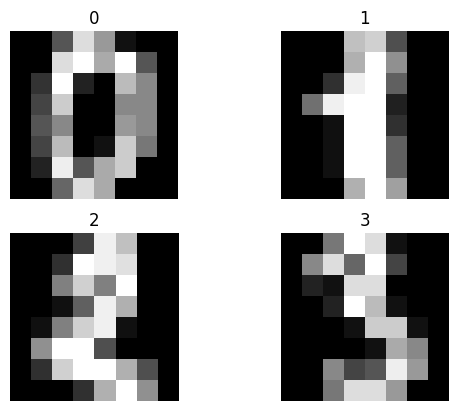

In [6]:
def k_folder_result(X, Y, model, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    result = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
    print(f'K = {k} Accuracy: %.3f' % result.mean())
    return result

print('iris')
iris = load_iris()
iris_x = iris['data']
iris_y = iris['target']
dsTree = DecisionTreeClassifier()
k_folder_result(iris_x, iris_y, dsTree, 10)  # 十折交叉验证 (k=10)
k_folder_result(iris_x, iris_y, dsTree, 8)   # 归一法      (k=8)

print('\ndigit')
mnist = load_digits()
mnist_x = mnist['images']
mnist_y = mnist['target']
mnist_slide = mnist['data']
k_folder_result(mnist_slide, mnist_y, dsTree, 10)  # 十折交叉验证 & 留一法 (k=10)
k_folder_result(mnist_slide, mnist_y, dsTree, 5)  # 五折交叉验证         (k=5)

fig, ax = plt.subplots(2, 2)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(mnist_x[i], cmap='gray')
    ax[i // 2][i % 2].set_title(mnist_y[i])
    plt.axis(False)
plt.show()